<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.143814,79.441625,25.542980,154.128419,140.389822,13.738597
1,0.0,1.0,52.175639,89.010149,-20.012245,131.173543,170.529714,-39.356171
2,0.0,2.0,56.547198,94.592051,203.862457,365.001706,184.081903,180.919803
3,0.0,3.0,67.847708,55.963693,-35.941903,97.869497,142.133519,-44.264022
4,0.0,4.0,38.121235,49.593548,-31.417458,66.297325,95.807826,-29.510501
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.714424,51.059283,-14.695819,119.077888,129.035223,-9.957335
249996,999.0,246.0,77.666190,68.818311,50.093710,206.578212,153.952226,52.625986
249997,999.0,247.0,49.344994,97.092492,23.638558,180.076044,156.809006,23.267038
249998,999.0,248.0,30.710320,76.950086,117.395958,235.056364,115.310753,119.745611


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.143814,79.441625,25.542980,154.128419,140.389822,13.738597
1,0.0,1.0,52.175639,89.010149,-20.012245,131.173543,170.529714,-39.356171
2,0.0,2.0,56.547198,94.592051,203.862457,365.001706,184.081903,180.919803
3,0.0,3.0,67.847708,55.963693,-35.941903,97.869497,142.133519,-44.264022
4,0.0,4.0,38.121235,49.593548,-31.417458,66.297325,95.807826,-29.510501
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.714424,51.059283,-14.695819,119.077888,129.035223,-9.957335
249996,999.0,246.0,77.666190,68.818311,50.093710,206.578212,153.952226,52.625986
249997,999.0,247.0,49.344994,97.092492,23.638558,180.076044,156.809006,23.267038
249998,999.0,248.0,30.710320,76.950086,117.395958,235.056364,115.310753,119.745611


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

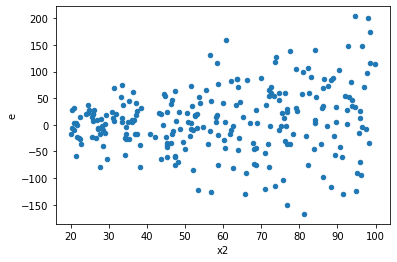

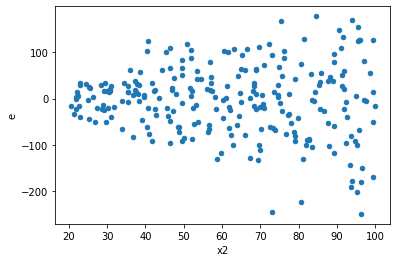

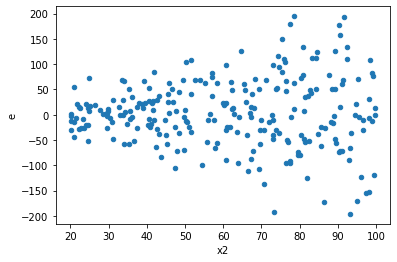

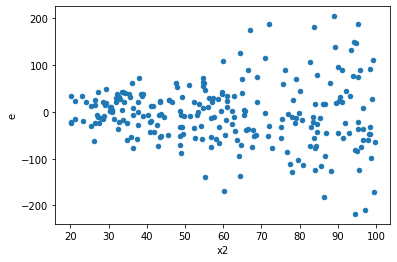

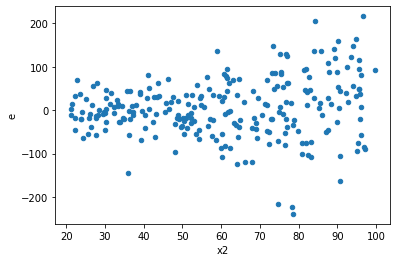

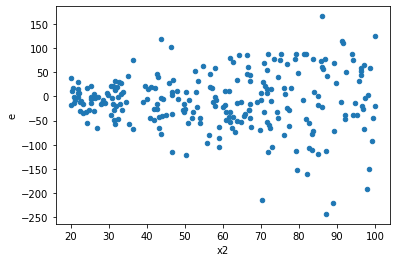

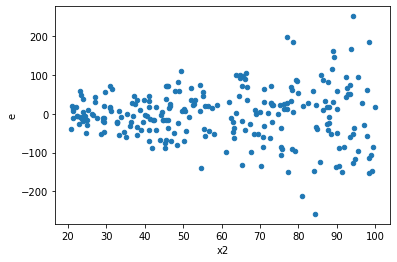

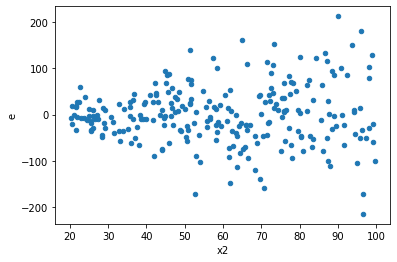

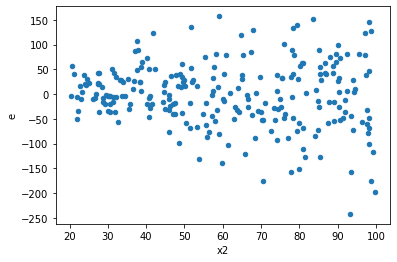

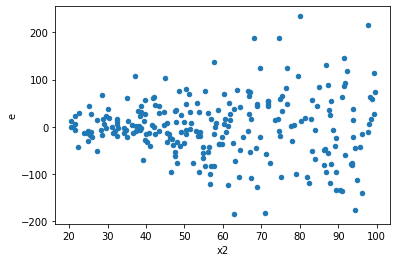

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,133.0,113.0,357854.1928694008,680061.0178499084,2690.6330290932387,6018.239096016889,2.236737240249026,1.475406373785404e-05,0.9999926229681311,7.37703186892702e-06,Reject005=0 : Heteroscedasticity
5.0,124.0,122.0,341487.19216611853,504583.2609620461,2753.9289690816013,4135.928368541361,1.5018282660792948,0.025017319415224115,0.9874913402923879,0.012508659707612058,Reject005=0 : Heteroscedasticity
6.0,104.0,142.0,267248.88807783986,912298.7226234276,2569.7008469023062,6424.638891714279,2.500150513418315,4.3876075173088225e-07,0.9999997806196241,2.1938037586544112e-07,Reject005=0 : Heteroscedasticity
10.0,132.0,114.0,489185.12081571633,770827.4222600261,3705.947884967548,6761.64405491251,1.8245383542331493,0.0010885141704157775,0.9994557429147921,0.0005442570852078887,Reject005=0 : Heteroscedasticity
11.0,113.0,133.0,240826.27171740276,805456.6808761188,2131.2059444017946,6056.065269745254,2.841614291501577,1.0716692866452604e-08,0.9999999946416536,5.358346433226302e-09,Reject005=0 : Heteroscedasticity
13.0,109.0,137.0,199469.36780197883,702379.0383080874,1829.9942000181545,5126.854294219616,2.801568602877952,1.5287414001363686e-08,0.999999992356293,7.643707000681843e-09,Reject005=0 : Heteroscedasticity
15.0,111.0,135.0,204852.64194195956,884862.8561496398,1845.5192967744106,6554.539675182517,3.551596391670631,5.049738405205062e-12,0.9999999999974751,2.524869202602531e-12,Reject005=0 : Heteroscedasticity
16.0,147.0,99.0,380361.71899407555,673715.9029613737,2587.4946870345275,6805.211141023977,2.630038691528014,5.938834521934666e-07,0.9999997030582739,2.969417260967333e-07,Reject005=0 : Heteroscedasticity
20.0,117.0,129.0,300836.1999634452,883424.5915101785,2571.2495723371385,6848.252647365725,2.663394763792222,8.524815608978997e-08,0.999999957375922,4.2624078044894986e-08,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,133.0,113.0,666322.8092427463,241045.3009584067,5009.945934155988,2133.144256269086,0.4257818915222388,2.6239696814536715e-06,Reject005=0 : Heteroscedasticity
1.0,128.0,118.0,882150.3914176822,482441.0471648546,6891.799932950642,4088.483450549615,0.5932388476632954,0.003931383453282196,Reject005=0 : Heteroscedasticity
2.0,131.0,115.0,780645.557150494,311839.63085236173,5959.126390461786,2711.6489639335805,0.45504135778591004,1.466355530492303e-05,Reject005=0 : Heteroscedasticity
3.0,133.0,113.0,357854.1928694008,680061.0178499084,2690.6330290932387,6018.239096016889,2.236737240249026,1.475406373785404e-05,Reject005=0 : Heteroscedasticity
4.0,112.0,134.0,725768.041968268,347954.31050880067,6480.071803288107,2596.6739590209004,0.40071684972739047,1.0167199421491873e-06,Reject005=0 : Heteroscedasticity
5.0,124.0,122.0,341487.19216611853,504583.2609620461,2753.9289690816013,4135.928368541361,1.5018282660792948,0.025017319415224115,Reject005=0 : Heteroscedasticity
6.0,104.0,142.0,267248.88807783986,912298.7226234276,2569.7008469023062,6424.638891714279,2.500150513418315,4.3876075173088225e-07,Reject005=0 : Heteroscedasticity
7.0,131.0,115.0,677255.6367433334,308303.2906771383,5169.890356819339,2680.898179801203,0.5185599683492256,0.00029019371745748617,Reject005=0 : Heteroscedasticity
8.0,147.0,99.0,750590.2839715016,243522.3346881278,5106.05635354763,2459.8215625063413,0.4817458704303733,5.643336970817954e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    933
Reject005=1 : Homoscedasticity       67
Name: Result_test, dtype: int64